## Observations and Insights 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [84]:
# Checking the number of mice.
unique_mice = len(mouse_metadata["Mouse ID"].unique())
with_duplicates = len(study_results["Mouse ID"])
print(f"The number of unique mice: {unique_mice}, with duplicates: {with_duplicates}")

The number of unique mice: 249, with duplicates: 1893


In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_df = combined_data_df[combined_data_df.duplicated(["Mouse ID"])]
all_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates_df = combined_data_df.drop_duplicates("Mouse ID")
drop_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [88]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mice = len(drop_duplicates_df["Mouse ID"])
print(f"The number of unique mice after dropping duplicates: {clean_unique_mice}")

The number of unique mice after dropping duplicates: 249


## Summary Statistics

In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_regimen = combined_data_df.groupby("Drug Regimen")
drug_regimen_mean = drug_regimen["Tumor Volume (mm3)"].mean()
drug_regimen_var = drug_regimen["Tumor Volume (mm3)"].var()
drug_regimen_median = drug_regimen["Tumor Volume (mm3)"].median()
drug_regimen_std = drug_regimen["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drug_regimen_df = pd.DataFrame({"Mean": drug_regimen_mean, "Median": drug_regimen_median, "Variance": drug_regimen_var,
                                "Standard Deviation": drug_regimen_std, "SEM": drug_regimen_sem})
drug_regimen_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# Using the aggregation method, produce the same summary statistics in a single line
combined_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

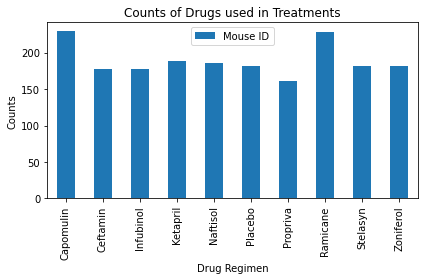

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(combined_data_df.groupby("Drug Regimen").count()).reset_index()
drug_data_df = drug_data[["Drug Regimen", "Mouse ID"]]
drug_data_df = drug_data_df.set_index("Drug Regimen")
drug_data_df.plot(kind = "bar")
plt.title("Counts of Drugs used in Treatments")
plt.ylabel("Counts")
plt.tight_layout()

Text(0, 0.5, 'Counts')

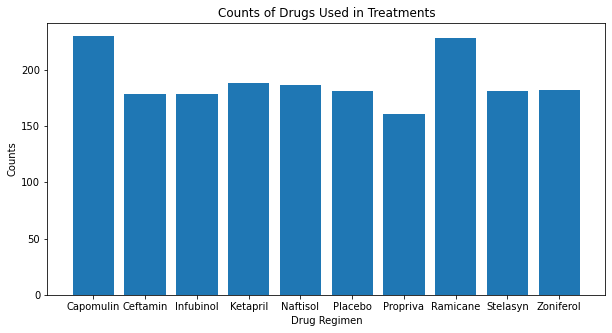

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
the_drugs = drug_regimen_df.index.tolist()
x_axis = the_drugs
drug_counts = (combined_data_df.groupby("Drug Regimen")["Mouse ID"].count()).tolist()
y_axis = drug_counts
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis)
plt.title("Counts of Drugs Used in Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

Text(0, 0.5, '')

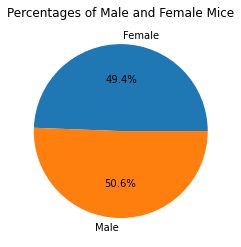

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = pd.DataFrame(combined_data_df.groupby("Sex").count()).reset_index()
gender_counts_df = gender_counts[["Sex", "Mouse ID"]]
gender_counts_df.plot(kind = "pie", y = "Mouse ID", autopct = "%1.1f%%", labels = gender_counts["Sex"], legend = False)
plt.title("Percentages of Male and Female Mice")
plt.xlabel("")
plt.ylabel("")


Text(0.5, 1.0, 'Percentages of Male and Female Mice')

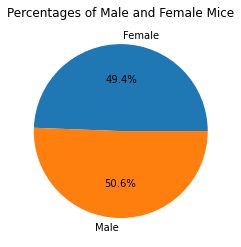

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = (combined_data_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
labels = ["Female", "Male"]
plt.pie(gender_counts, labels = labels, autopct = "%1.1f%%")
plt.axis = "equal"
plt.title("Percentages of Male and Female Mice")

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = combined_data_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"])
last_value = sorted_df.loc[sorted_df["Timepoint"] == 45]
merged_max = pd.merge(last_value, combined_data_df, on = "Mouse ID")
merged_max

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,b128,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,45,38.982878,2,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,w575,Zoniferol,Female,16,28,45,68.401286,3,Zoniferol,Female,16,28,25,58.587322,1
1296,w575,Zoniferol,Female,16,28,45,68.401286,3,Zoniferol,Female,16,28,30,60.153065,1
1297,w575,Zoniferol,Female,16,28,45,68.401286,3,Zoniferol,Female,16,28,35,63.686445,2
1298,w575,Zoniferol,Female,16,28,45,68.401286,3,Zoniferol,Female,16,28,40,64.938406,3


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    boxplot_df = merged_max.loc[merged_max["Drug Regimen_x"] == treatment]
    tumor_vol_df = boxplot_df.loc[boxplot_df["Timepoint_x"] == boxplot_df["Timepoint_x"]]
    vol_values = tumor_vol_df["Tumor Volume (mm3)_x"]
    tumor_vol.append(vol_values)
    
    quartiles = vol_values.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"Lower quartile of {treatment}: {lowerq}")
    print(f"Upper quartile of {treatment}: {upperq}")
    print(f"Interquartile range of {treatment}: {iqr}")
    print(f"Median of {treatment}: {quartiles[0.5]}") 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Lower bound of {treatment}: {lower_bound}")
    print(f"Upper bound of {treatment}: {upper_bound}")
    

    

Lower quartile of Capomulin: 32.37735684
Upper quartile of Capomulin: 40.1592203
Interquartile range of Capomulin: 7.781863460000004
Median of Capomulin: 37.31184577
Lower bound of Capomulin: 20.70456164999999
Upper bound of Capomulin: 51.83201549
Lower quartile of Ramicane: 30.981175224999998
Upper quartile of Ramicane: 38.508305307499995
Interquartile range of Ramicane: 7.527130082499998
Median of Ramicane: 34.848627300000004
Lower bound of Ramicane: 19.690480101250003
Upper bound of Ramicane: 49.79900043124999
Lower quartile of Infubinol: 62.75445141
Upper quartile of Infubinol: 67.68556862
Interquartile range of Infubinol: 4.9311172099999965
Median of Infubinol: 66.08306589
Lower bound of Infubinol: 55.35777559500001
Upper bound of Infubinol: 75.08224443499999
Lower quartile of Ceftamin: 61.43389223
Upper quartile of Ceftamin: 67.52748237
Interquartile range of Ceftamin: 6.093590140000003
Median of Ceftamin: 64.29983003
Lower bound of Ceftamin: 52.29350701999999
Upper bound of Ceft

([<matplotlib.axis.XTick at 0x1cfbeaf0250>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Ibunifol'),
  Text(4, 0, 'Ceftamin')])

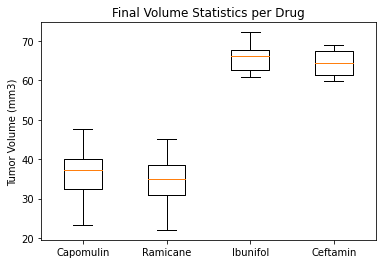

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='b', markersize=6, markeredgecolor='black')
plt.boxplot(tumor_vol, flierprops = flierprops)
plt.title("Final Volume Statistics per Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Ibunifol", "Ceftamin"])


## Line and Scatter Plots

Text(0.5, 0, 'Tumor Volume (mm3)')

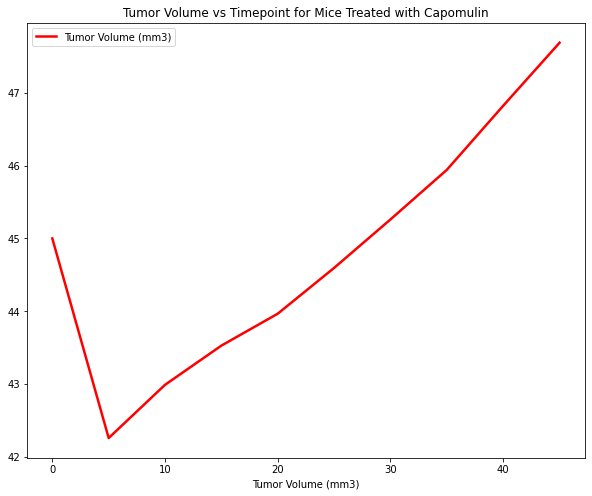

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")
plt.title("Tumor Volume vs Timepoint for Mice Treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")


<ipython-input-99-f0a35143e2b7>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_tumor_vol = pd.DataFrame(weight_df.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean())


Text(0.5, 1.0, 'Average Tumor Volume by Weight')

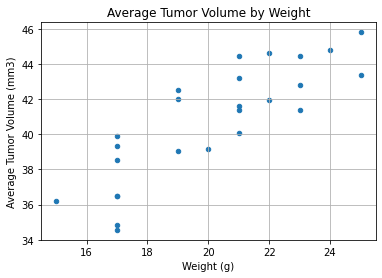

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_tumor_vol = pd.DataFrame(weight_df.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean())
avg_tumor_vol = avg_tumor_vol.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
avg_tumor_vol
avg_tumor_vol.plot(kind = "scatter", x = "Weight (g)", y = "Average Tumor Volume (mm3)", grid = True)
plt.title("Average Tumor Volume by Weight")

## Correlation and Regression

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_tumor_vol.loc[:, "Weight (g)"]
avg_vol = avg_tumor_vol.loc[:, "Average Tumor Volume (mm3)"]
corrcoef = st.pearsonr(mouse_weight, avg_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume for Capomulin: {round(corrcoef[0], 2)}")

The correlation coefficient between mouse weight and average tumor volume for Capomulin: 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

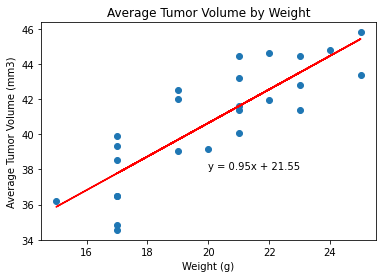

In [103]:
x_axis = avg_tumor_vol["Weight (g)"]
y_axis = avg_tumor_vol["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(20,38),fontsize=10,color="black")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")